In [1]:
# This is the code for Exercise 4 question 1.
import numpy as np
from scipy.signal import StateSpace, lsim, dlsim
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Build the CT system.
A = np.asarray([[0., 1.],
                [-2., -2.]])
B = np.asarray([[1.],[1.]])
C = np.asarray([2.,3.])
D = np.asarray([0.])
t_CT = np.arange(0, 5.01, 0.01)
input_CT = np.ones(len(t_CT))
sys_CT = StateSpace(A, B, C, D)
_, y_CT, x_CT = lsim(sys_CT, input_CT, t_CT, X0=[0., 0.])
y5_CT = y_CT[-1]
print("In the CT system, y(5) is:", y5_CT)

In the CT system, y(5) is: -0.03230590469409034


The discretized state space representation of this system is:
StateSpaceDiscrete(
array([[ 0.50832599,  0.30955988],
       [-0.61911975, -0.11079377]]),
array([[ 1.0479797 ],
       [-0.18197878]]),
array([[2., 3.]]),
array([[0.]]),
dt: 1
)
In the DT system, y(5) is: -0.03150713422428986


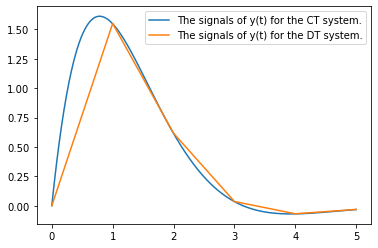

In [2]:
# This is the code for Exercise 4 question 2 and 3.
# Calculate the DT system.
G = expm(A);
H = np.asarray([[0.,0.],[0.,0.]])
step = np.arange(0,1.001,0.001)
for i in step:
    H += expm(A*i) * 0.001
H = np.dot(H, B)

# Build the DT system.
sys_DT = StateSpace(G, H, C, D, dt = 1)
print("The discretized state space representation of this system is:")
print(sys_DT)
t_DT = np.arange(0, 6, 1);
input_DT = np.ones(len(t_DT))
_, y_DT, x_DT = dlsim(sys_DT, input_DT, t_DT, x0=[0., 0.])
y5_DT = y_DT[-1,0]
print("In the DT system, y(5) is:", y5_DT)

# Plot the result of CT and DT system.
plt.plot(t_CT, y_CT, label = "The signals of y(t) for the CT system.")
plt.plot(t_DT, y_DT, label = "The signals of y(t) for the DT system.")
plt.legend()
plt.show()